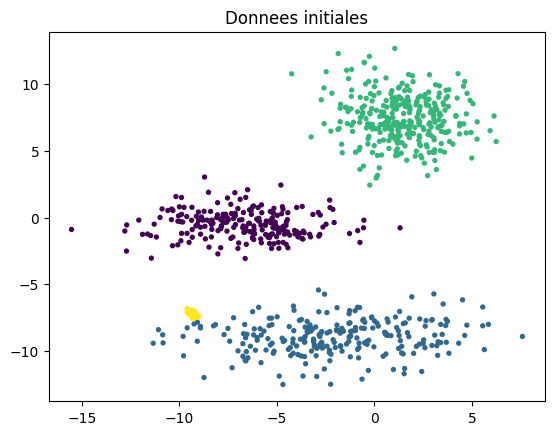

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
# Parser un fichier de donnees au format arff
# data est un tableau d'exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features ( dimension 2 )
# Ex : [[ - 0 . 499261 , -0 . 0612356 ] ,
# [ - 1 . 51369 , 0 . 265446 ] ,
# [ - 1 . 60321 , 0 . 362039 ] , .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster . On retire cette information
# path = "./dataset/2d-4c.arff"
path = "./dataset/2d-4c-no9.arff"
# path = "./dataset/donut3.arff"
# path = "./dataset/tetra.arff"
# path = "./dataset/3-spiral.arff"
databrut = arff.loadarff(open(path, 'r'))
datanp = np.array([[x[0], x[1]] for x in databrut[0]])
ground_truth = np.array([x[2] for x in databrut[0]])
# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [ - 0 . 499261 , -1 . 51369 , -1 . 60321 , ...]
# Ex pour f1 = [ - 0 . 0612356 , 0 . 265446 , 0 . 362039 , ...]
f0 = datanp[:, 0] # tous les elements de la premiere colonne
f1 = datanp[:, 1] # tous les elements de la deuxieme colonne
plt.scatter(f0, f1, c = ground_truth, s=8)
plt.title("Donnees initiales")
plt.show()

def init (data_path, plot_bool) :
      databrut = arff.loadarff(open(data_path, 'r'))
      datanp = np.array([[x[0], x[1]] for x in databrut[0]])
      ground_truth = np.array([x[2] for x in databrut[0]])
      f0 = datanp[:, 0] # tous les elements de la premiere colonne
      f1 = datanp[:, 1] # tous les elements de la deuxieme colonne
      if plot_bool :
        plt.scatter(f0, f1, c = ground_truth, s=8)
        plt.title("Donnees initiales")
        plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import time
from sklearn import cluster
from sklearn import metrics

def k_means(data_path, k=2):
    init (data_path,1)

    tps1 = time.time()
    model = cluster.KMeans(n_clusters=k, init='random', random_state=10)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =", k, ", nb iter =", iteration, ", runtime =", round((tps2 - tps1) * 1000, 2), "ms")
    silhouette_score = metrics.silhouette_score(datanp, labels, metric='euclidean')
    print("Silhouette score :", silhouette_score)
    davies_bouldin_score = metrics.davies_bouldin_score(datanp, labels)
    print("Davies_bouldin score :", davies_bouldin_score)
    calinski_harabasz_score = metrics.calinski_harabasz_score(datanp, labels)
    print("calinski_harabasz score :", calinski_harabasz_score)

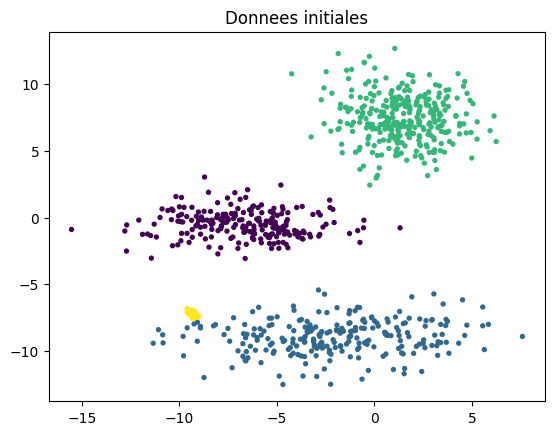

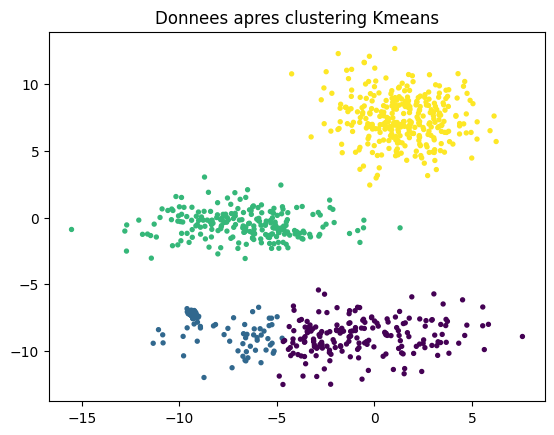

nb clusters = 4 , nb iter = 5 , runtime = 789.36 ms
Silhouette score : 0.6410098765494229
Davies_bouldin score : 0.49338851730063016
calinski_harabasz score : 2775.6685110655926
pour les 3 prochains datasets, la méthode des kmeans n'est pas adaptée, les points sont soit rassemblées en courbe, soit dispersés sans clusters apparents, la méthode kmeans n'arrive pas à les regrouper correctement


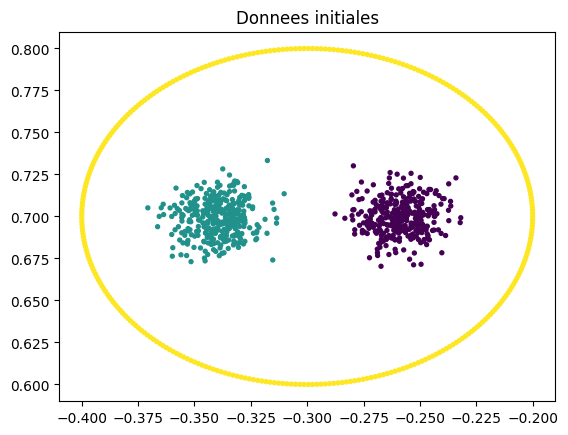

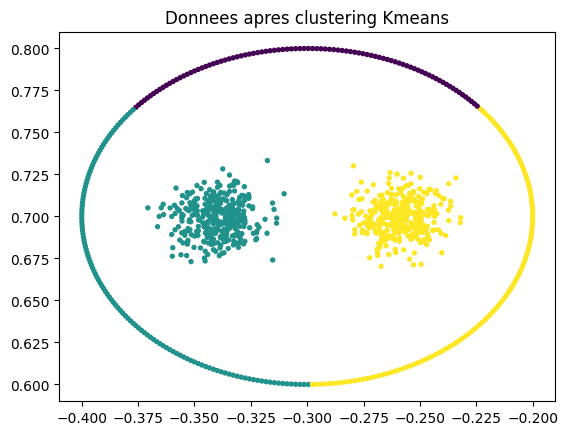

nb clusters = 3 , nb iter = 4 , runtime = 65.16 ms
Silhouette score : 0.562751140280719
Davies_bouldin score : 0.6729970525189101
calinski_harabasz score : 931.5324859948547


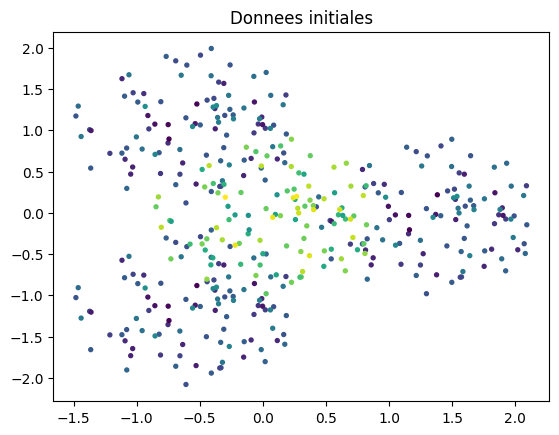

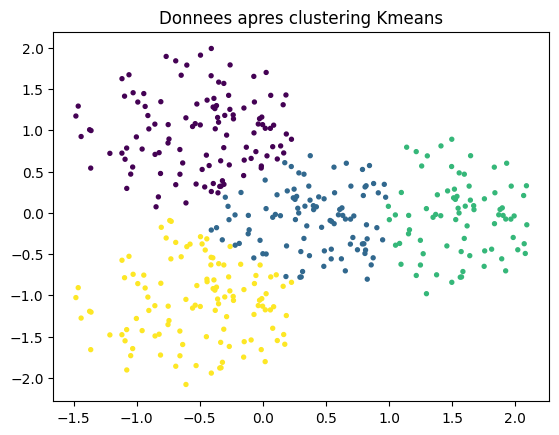

nb clusters = 4 , nb iter = 13 , runtime = 40.06 ms
Silhouette score : 0.41941227532407427
Davies_bouldin score : 0.7932572271453546
calinski_harabasz score : 488.37624124104815


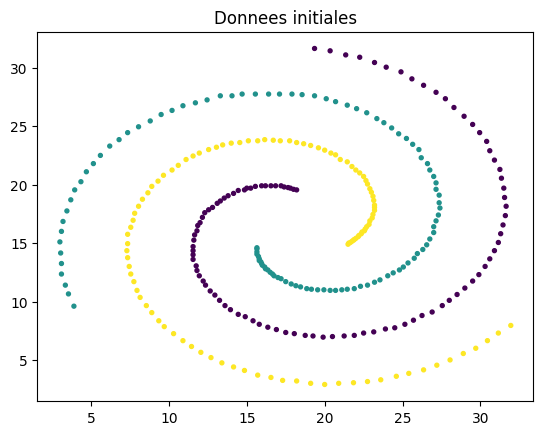

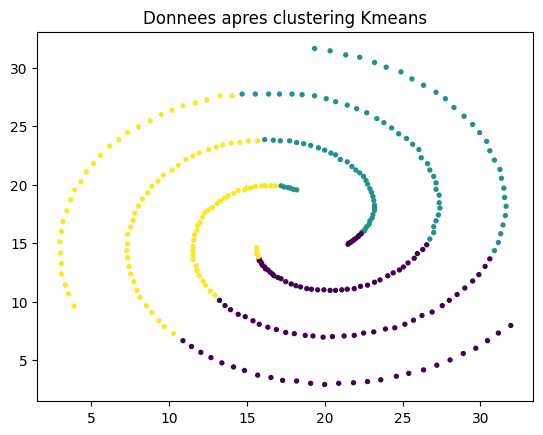

nb clusters = 3 , nb iter = 11 , runtime = 49.45 ms
Silhouette score : 0.3608943177577447
Davies_bouldin score : 0.8874106094613804
calinski_harabasz score : 238.04612727332426


In [3]:
k_means("./dataset/2d-4c-no9.arff", k=4)
print("pour les 3 prochains datasets, la méthode des kmeans n'est pas adaptée, les points sont soit rassemblées en courbe, soit dispersés sans clusters apparents, la méthode kmeans n'arrive pas à les regrouper correctement")
k_means("./dataset/donut3.arff", k=3)
k_means("./dataset/tetra.arff", k=4)
k_means("./dataset/3-spiral.arff", k=3)

Appel KMeans pour une valeur fixee de k 


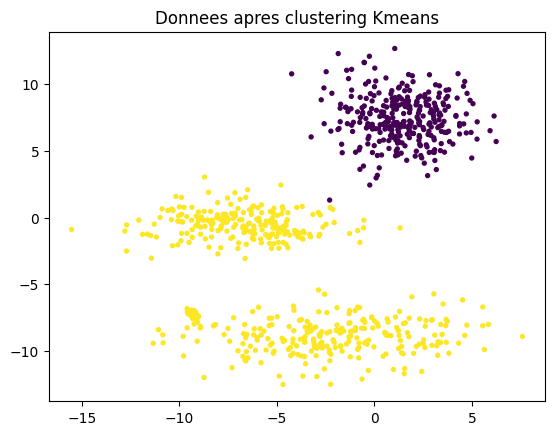

nb clusters = 2 , nb iter = 4 , runtime = 666.46 ms
Silhouette score : 0.605567652172048
Davies_bouldin score : 0.5370987937006936
calinski_harabasz score : 1762.3291353530572


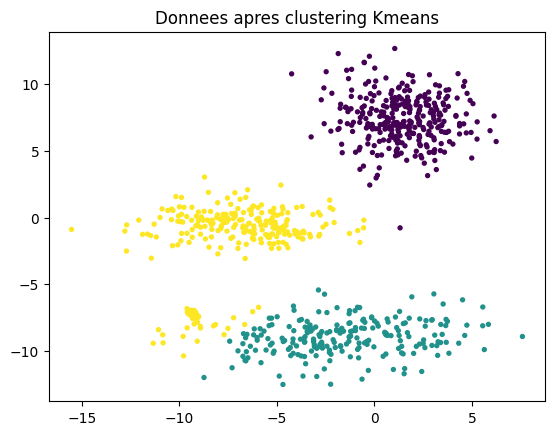

nb clusters = 3 , nb iter = 3 , runtime = 57.46 ms
Silhouette score : 0.5936466818932
Davies_bouldin score : 0.6901945937772455
calinski_harabasz score : 2116.7384484289246


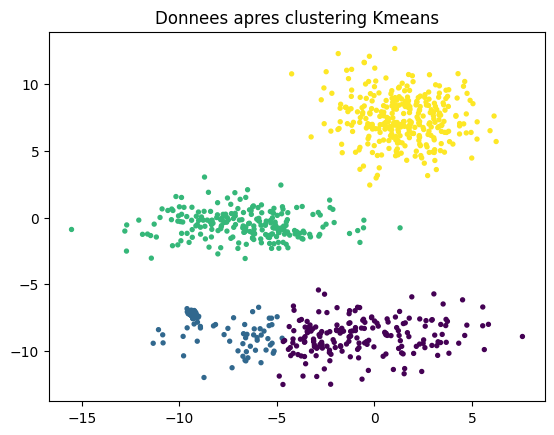

nb clusters = 4 , nb iter = 5 , runtime = 56.65 ms
Silhouette score : 0.6410098765494229
Davies_bouldin score : 0.49338851730063016
calinski_harabasz score : 2775.6685110655926


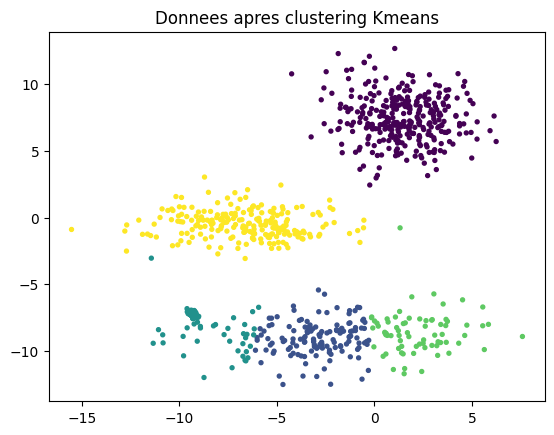

nb clusters = 5 , nb iter = 6 , runtime = 66.5 ms
Silhouette score : 0.624660192252783
Davies_bouldin score : 0.553878009916841
calinski_harabasz score : 2586.835137365194


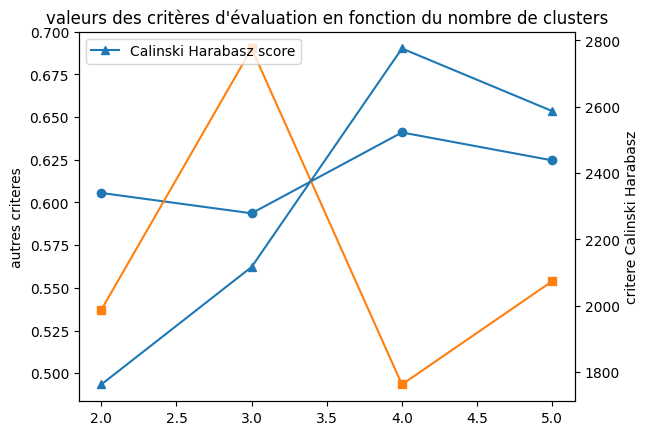

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster
from sklearn import metrics
#
# Les donnees sont dans datanp ( 2 dimensions )
# f0 : valeurs sur la premiere dimension
# f1 : valeur sur la deuxieme dimension
#
print("Appel KMeans pour une valeur fixee de k ")
tab_Silhouette =[]
tab_Davies_bouldin = []
tab_calinski_harabasz = []

for k in range(2, 6):
    tps1 = time.time()
    model = cluster.KMeans(n_clusters=k, init='random', random_state=10)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =", k, ", nb iter =", iteration, ", runtime =", round((tps2 - tps1) * 1000, 2), "ms")
    silhouette_score = metrics.silhouette_score(datanp, labels, metric='euclidean')
    tab_Silhouette.append (silhouette_score)
    print("Silhouette score :", silhouette_score)
    davies_bouldin_score = metrics.davies_bouldin_score(datanp, labels)
    tab_Davies_bouldin.append(davies_bouldin_score)
    print("Davies_bouldin score :", davies_bouldin_score)
    calinski_harabasz_score = metrics.calinski_harabasz_score(datanp, labels)
    tab_calinski_harabasz.append(calinski_harabasz_score)
    print("calinski_harabasz score :", calinski_harabasz_score)

x=list(range(2,6))
fig, ax1 =plt.subplots()

ax1.plot(x,tab_Silhouette,marker='o',label="silhouette score")
ax1.plot(x,tab_Davies_bouldin,marker='s',label ="Davies Bouldin score")
ax1.set_ylabel("autres criteres")

ax2=ax1.twinx()
ax2.plot(x,tab_calinski_harabasz, marker = '^',label="Calinski Harabasz score")
ax2.set_ylabel("critere Calinski Harabasz")

plt.title("valeurs des critères d'évaluation en fonction du nombre de clusters")
plt.xlabel("nb clusters")

plt.legend()
plt.show()

On remarque que pour ce dataset, le nombre de cluster pour lequel le nombre d'iterations est le plus bas, le silhouette score et le Davides Bouldin score sont le plus bas, le Calinski Harabasz score le plus haut est bien 4, le nombre de clusters des données initiales.

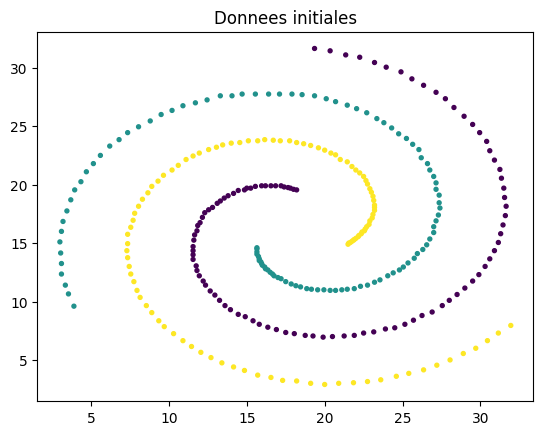

 Dendrogramme ’single’ donnees initiales 


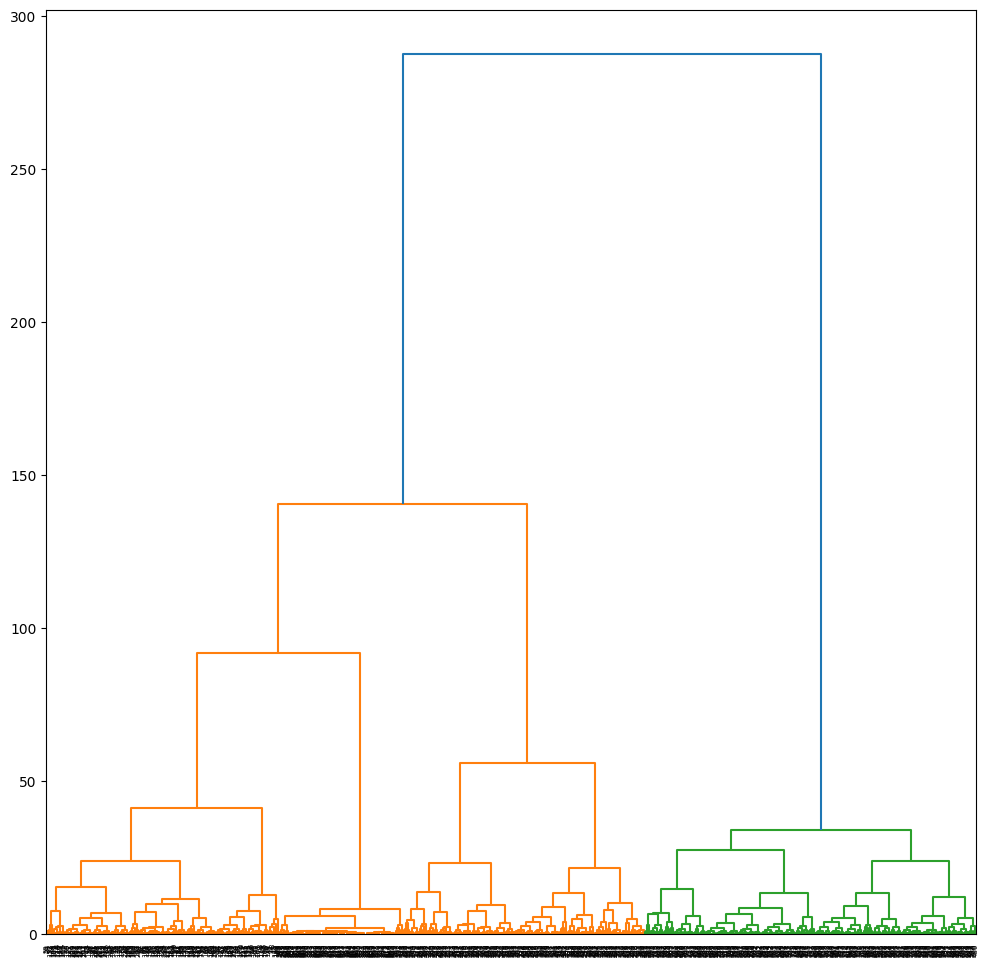

In [7]:
import scipy.cluster.hierarchy as shc
# Donnees dans datanp

def plot_Dendogramme (data_path):
    init (data_path,1)

    print ( " Dendrogramme ’single’ donnees initiales " )
    linked_mat = shc.linkage(datanp, 'ward')
    plt.figure(figsize=(12, 12))
    shc.dendrogram(linked_mat,
                    orientation = 'top',
                    distance_sort = 'descending',
                    show_leaf_counts = False )
    plt.show()

plot_Dendogramme("./dataset/3-spiral.arff")

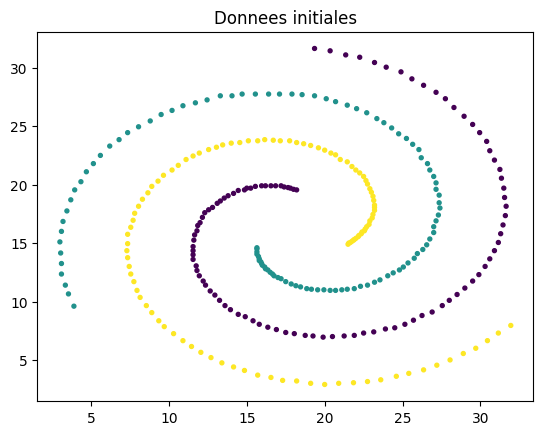

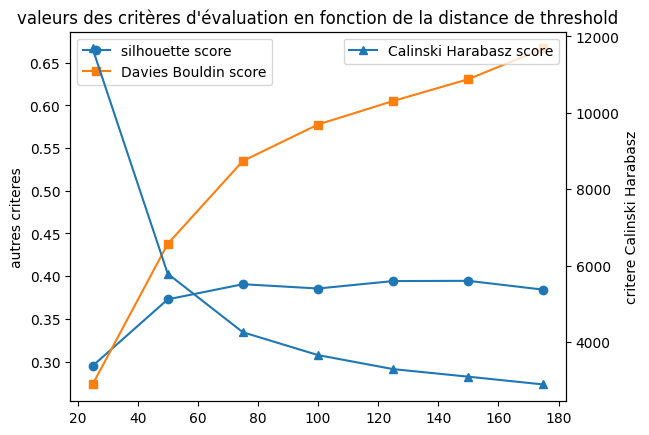

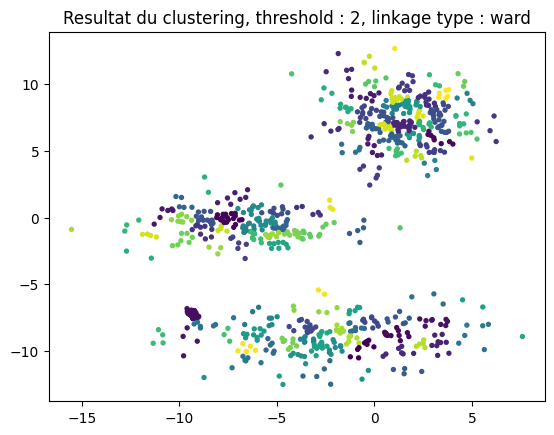

 nb clusters =  117  , nb feuilles =  876  runtime =  12.99  ms 
nb clusters = 117 , nb iter = 6 , runtime = 12.99 ms
Silhouette score : 0.41195733681645746
Davies_bouldin score : 0.701391078314724
calinski_harabasz score : 2716.539338224


In [ ]:
def clustering_distance_threshold ( distance, linkage_type, plot_bool):
      

      # set distance_threshold ( 0 ensures we compute the full tree )
      tps1 = time.time()
      model = cluster.AgglomerativeClustering(distance_threshold=distance,
                                          linkage=linkage_type, n_clusters=None)
      model = model.fit(datanp)
      tps2 = time.time()
      labels = model.labels_
      k = model.n_clusters_
      leaves = model.n_leaves_
      silhouette_score = metrics.silhouette_score(datanp, labels, metric='euclidean')
      davies_bouldin_score = metrics.davies_bouldin_score(datanp, labels)
      calinski_harabasz_score = metrics.calinski_harabasz_score(datanp, labels)
      # Affichage clustering
      if plot_bool :
            plt.scatter(f0, f1, c=labels, s=8)
            plt.title("Resultat du clustering, threshold : " + str(distance) + ", linkage type : "+linkage_type)
            plt.show()
            print(" nb clusters = ", k, " , nb feuilles = ", leaves,
                  " runtime = ", round((tps2 - tps1) * 1000, 2), " ms ")
            print("nb clusters =", k, ", nb iter =", iteration, ", runtime =", round((tps2 - tps1) * 1000, 2), "ms")
            print("Silhouette score :", silhouette_score)
            print("Davies_bouldin score :", davies_bouldin_score)
            print("calinski_harabasz score :", calinski_harabasz_score)
      
      
      else : return [silhouette_score,davies_bouldin_score,calinski_harabasz_score]

tab_Silhouette =[]
tab_Davies_bouldin = []
tab_calinski_harabasz = []

init ("./dataset/3-spiral.arff",1)

for i in range (25,176,25) :
      x=i/100
      result =clustering_distance_threshold(x,'ward',0)
      tab_Silhouette.append(result[0])
      tab_Davies_bouldin.append(result[1])
      tab_calinski_harabasz.append(result[2])

x=list(range(25,176,25))
fig, ax1 =plt.subplots()

ax1.plot(x,tab_Silhouette,marker='o',label="silhouette score")
ax1.plot(x,tab_Davies_bouldin,marker='s',label ="Davies Bouldin score")
ax1.set_ylabel("autres criteres")
plt.legend()

ax2=ax1.twinx()
ax2.plot(x,tab_calinski_harabasz, marker = '^',label="Calinski Harabasz score")
ax2.set_ylabel("critere Calinski Harabasz")

plt.title("valeurs des critères d'évaluation en fonction de la distance de threshold")
plt.xlabel("nb clusters")

plt.legend()
plt.show()  

init ("./dataset/3-spiral.arff",0)
clustering_distance_threshold(2,'ward',1)


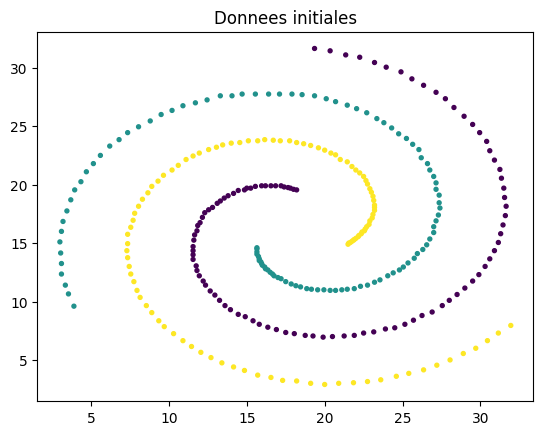

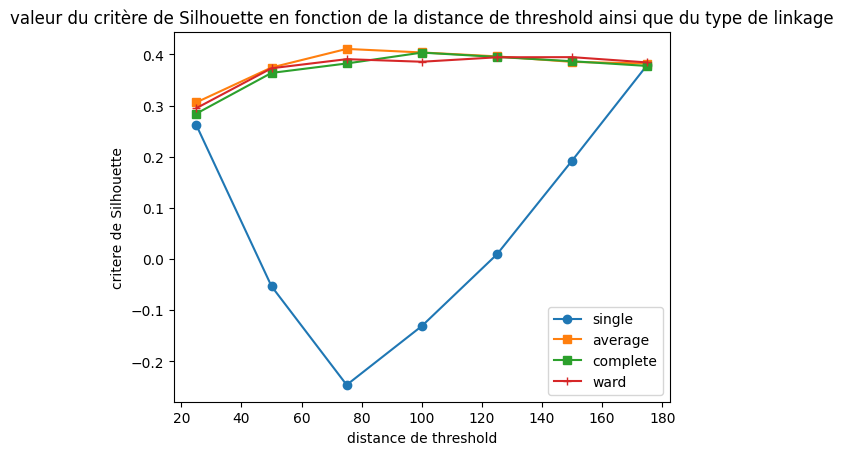

In [16]:
def test_diferent_ward (datapath) :
    init(datapath,1)
    wards = ['single', 'average', 'complete', 'ward']
    tab_single=[]
    tab_average=[]
    tab_complete=[]
    tab_linkage=[]
    tab=[tab_single,tab_average,tab_complete,tab_linkage]
    h=0
    for x in wards :
        for i in range (25,176,25) :
            j =i/100
            result =clustering_distance_threshold(j,x,0)
            tab[h].append(result[0])
        h=h+1
    
    x=list(range(25,176,25))
    fig, ax1 =plt.subplots()

    ax1.plot(x,tab[0],marker='o',label="single")
    ax1.plot(x,tab[1],marker='s',label ="average")
    ax1.plot(x,tab[2],marker='s',label ="complete")
    ax1.plot(x,tab[3],marker='+',label ="ward")
    ax1.set_ylabel("critere de Silhouette")

    plt.title("valeur du critère de Silhouette en fonction de la distance de threshold ainsi que du type de linkage")
    plt.xlabel("distance de threshold")

    plt.legend()
    plt.show()  

test_diferent_ward ("./dataset/3-spiral.arff")

        

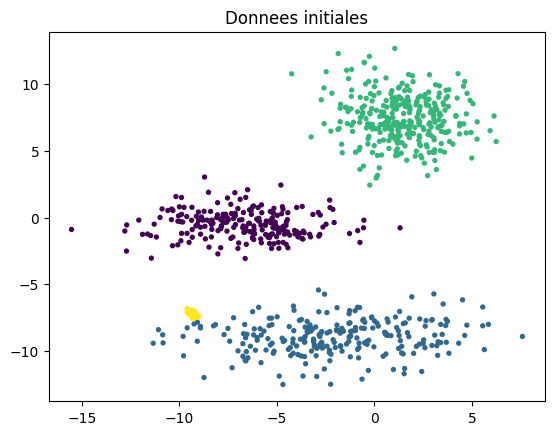

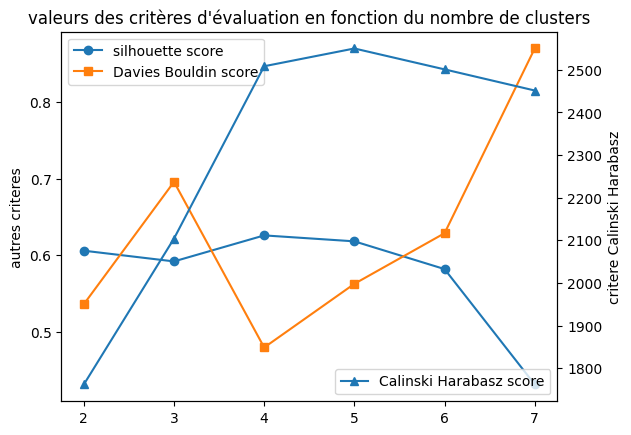

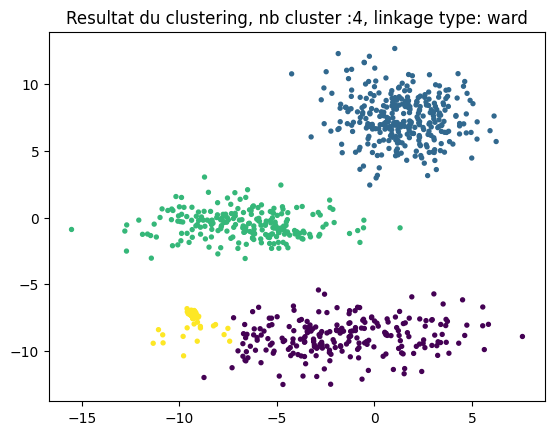

 nb clusters =  5  , nb feuilles =  876  runtime =  10.02  ms 
nb clusters = 5 , nb iter = 6 , runtime = 10.02 ms
Silhouette score : 0.625888956682714
Davies_bouldin score : 0.47932499174782534
calinski_harabasz score : 2508.235296590287


In [ ]:


def clustering_clusters_number ( nb_clusters, linkage_type, plot_bool):
      
      tps1 = time.time()
      model = cluster.AgglomerativeClustering(linkage=linkage_type, n_clusters=nb_clusters)
      model = model.fit(datanp)
      tps2 = time.time()
      labels = model.labels_
      kres = model.n_clusters_
      leaves = model.n_leaves_

      silhouette_score = metrics.silhouette_score(datanp, labels, metric='euclidean')
      davies_bouldin_score = metrics.davies_bouldin_score(datanp, labels)
      calinski_harabasz_score = metrics.calinski_harabasz_score(datanp, labels)
      if plot_bool :
            # Affichage clustering
            plt.scatter(f0, f1, c=labels, s=8)
            plt.title("Resultat du clustering, nb cluster :"+str(nb_clusters)+", linkage type: "+linkage_type)
            plt.show()
            print(" nb clusters = ", k, " , nb feuilles = ", leaves,
                  " runtime = ", round((tps2 - tps1) * 1000, 2), " ms ")
            print("nb clusters =", k, ", nb iter =", iteration, ", runtime =", round((tps2 - tps1) * 1000, 2), "ms")
            print("Silhouette score :", silhouette_score)
            print("Davies_bouldin score :", davies_bouldin_score)
            print("calinski_harabasz score :", calinski_harabasz_score)

      else : return [silhouette_score,davies_bouldin_score,calinski_harabasz_score]
      
def clustering_clusters_number_test (data_path) :
      
      init (data_path,1)

      tab_Silhouette =[]
      tab_Davies_bouldin = []
      tab_calinski_harabasz = []

      for i in range (2,8) :
            result=clustering_clusters_number ( i, 'ward',0)
            tab_Silhouette.append(result[0])
            tab_Davies_bouldin.append(result[1])
            tab_calinski_harabasz.append(result[2])

      x=list(range(2,8))
      fig, ax1 =plt.subplots()

      ax1.plot(x,tab_Silhouette,marker='o',label="silhouette score")
      ax1.plot(x,tab_Davies_bouldin,marker='s',label ="Davies Bouldin score")
      ax1.set_ylabel("autres criteres")
      plt.legend()

      ax2=ax1.twinx()
      ax2.plot(x,tab_calinski_harabasz, marker = '^',label="Calinski Harabasz score")
      ax2.set_ylabel("critere Calinski Harabasz")

      plt.title("valeurs des critères d'évaluation en fonction du nombre de clusters")
      plt.xlabel("nb clusters")

      plt.legend()
      plt.show()  



clustering_clusters_number_test ("./dataset/2d-4c-no9.arff")
clustering_clusters_number ( 4, 'ward',1)

On va maintenant observer la même étude pour des dataset qui ne sont pas adaptés à la méthode de clustering :

In [ ]:
clustering_clusters_number_test ("./dataset/2d-4c-no9.arff")
clustering_clusters_number ( 4, 'ward',1)

clustering_clusters_number_test ("./dataset/2d-4c-no9.arff")
clustering_clusters_number ( 4, 'ward',1)

clustering_clusters_number_test ("./dataset/2d-4c-no9.arff")
clustering_clusters_number ( 4, 'ward',1)